In [2]:
pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 141 kB 7.6 MB/s 
  Created wheel for pyod: filename=pyod-1.0.6-py3-none-any.whl size=175098 sha256=8f9f4f2f86b85087595c584d775ad3af3ab77a987320f5b74efdb36e620f73dc
  Stored in directory: /root/.cache/pip/wheels/98/93/e6/6d40410d9635ecde42d06041a1ba7f2ee7396e036fcf702e73
Successfully built pyod


In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager 
from pyod.models.knn import KNN
from pyod.utils.data import generate_data, get_outliers_inliers

In [4]:
X_train, y_train = generate_data(n_train = 300, train_only= True, n_features = 2) 
outlier_fraction = 0.1
X_outliers, X_inliers = get_outliers_inliers (X_train, y_train)
n_inliers = len(X_inliers)
n_outliers = len(X_outliers) 
f1 = X_train[:, [0]].reshape(-1, 1)
f2 = X_train[:, [1]].reshape(-1, 1)

Text(0, 0.5, 'Feature 2')

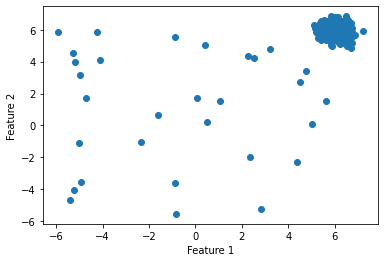

In [5]:
xx, yy = np.meshgrid (np.linspace (-10, 10, 200),np.linspace(-10,10,200))
plt.scatter(f1,f2)
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2')

In [6]:
clf = KNN (contamination = outlier_fraction)
clf.fit(X_train, y_train)
scores_pred = clf.decision_function(X_train)*-1
y_pred = clf.predict(X_train)
n_errors = (y_pred != y_train).sum()

print('The number of prediction errors are' + str(n_errors))

The number of prediction errors are0


/usr/local/lib/python3.8/dist-packages/pyod/models/base.py:410: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


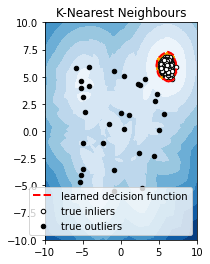

In [7]:
threshold  = stats.scoreatpercentile (scores_pred, 100 * outlier_fraction) 
Z = clf.decision_function (np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
subplot = plt.subplot(1, 2, 1)

subplot.contourf (xx, yy, Z, levels = np.linspace (Z.min(),threshold, 10), cmap = plt.cm.Blues_r)

a = subplot.contour (xx, yy, Z, levels =[threshold],linewidths = 2, colors ='red')

subplot.contourf(xx, yy, Z, levels = [threshold, Z.max()], colors ='orange')


b = subplot.scatter (X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white', s = 20, edgecolor='k')

c = subplot.scatter (X_train[-n_outliers:, 0], X_train[-n_outliers:, 1],

c='black', s = 20, edgecolor = 'k')

subplot.axis('tight')

subplot.legend([a.collections[0], b, c],['learned decision function', 'true inliers', 'true outliers'],

prop = matplotlib.font_manager.FontProperties (size = 10), loc = 'lower right')

subplot.set_title('K-Nearest Neighbours')
subplot.set_xlim((-10, 10))

subplot.set_ylim((-10, 10))

plt.show()